In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

In [2]:
# Reading Data

data = pd.read_csv('Cars_Data.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
# Checking For Null Values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
# Price is our target variable so dropping data where price is missing


data = data.dropna(subset=['Price'],axis=0)


In [7]:
data.isnull().sum()

Brand             0
Price             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
# Replacing null values of Engine Volume with it's mean

data['EngineV'].fillna(data['EngineV'].mean(),inplace=True)
data.isnull().sum()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [9]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.000000,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,2014,Corolla


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

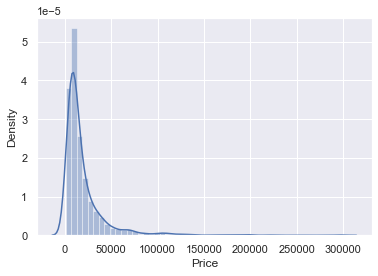

In [10]:
# Visualizing target variable

sns.distplot(data['Price'])

In [11]:
# Removing outliers in Price

q = data['Price'].quantile(0.99)
data_1 = data[data['Price']<q]

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

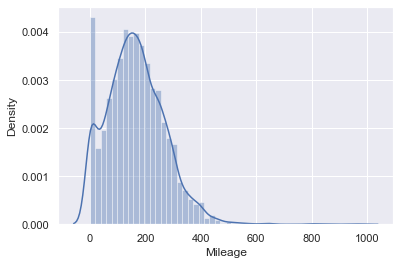

In [12]:
sns.distplot(data_1['Mileage'])

In [13]:
# Removing outliers in Mileage

q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

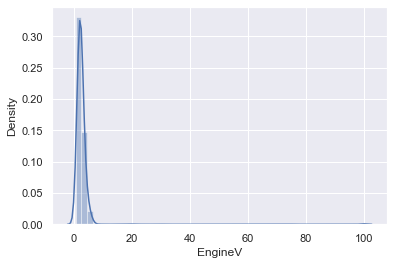

In [14]:
sns.distplot(data_2['EngineV'])

In [15]:
# In this data missing values of Engine Volume are indicated with 99 or 99.99. A rough google search 
# indicates that engine volume can have value upto 6.5

data_3 = data_2[data_2['EngineV']<6.5]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

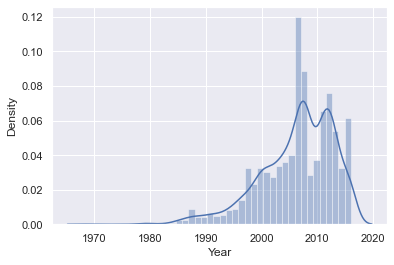

In [16]:
sns.distplot(data_3['Year'])

In [17]:
# Year has outliers in the beginning hence removing those

q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [18]:
data_cleaned = data_4.reset_index(drop=True)

In [19]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4005,Toyota,17900.0,sedan,35,1.600000,Petrol,yes,2014,Corolla
4006,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014,S 350
4007,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999,535
4008,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,2014,Corolla


In [20]:
# Cgecking for correlation among numerical data

df = data_cleaned[['Price','Mileage','Year']]
df.corr()

,Price,Mileage,Year
Price,1.000000,-0.552884,0.571034
Mileage,-0.552884,1.000000,-0.718924
Year,0.571034,-0.718924,1.000000


In [21]:
# Our cleaned data has minimum year as 1988 and maximum year as 2016 so i have categorized year into 3 categories.

data_cleaned['Type']='NA'
data_cleaned.loc[(data_cleaned['Year'] <1998), 'Type'] = 'Old'
data_cleaned.loc[(data_cleaned['Year'] >1997) & (data_cleaned['Year'] <2007) , 'Type'] = 'Moderate'
data_cleaned.loc[data_cleaned['Year'] >=2007, 'Type'] = 'New'

In [22]:
data_cleaned



,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Type
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991,320,Old
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999,Sprinter 212,Moderate
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003,S 500,Moderate
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007,Q7,New
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011,Rav 4,New
...,...,...,...,...,...,...,...,...,...,...
4005,Toyota,17900.0,sedan,35,1.600000,Petrol,yes,2014,Corolla,New
4006,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014,S 350,New
4007,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999,535,Moderate
4008,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,2014,Corolla,New


In [23]:
pd. set_option('display.max_rows', 500)
model_count = data.Model.value_counts()


In [24]:
# Model has 320 unique values. We can either drop model variable or create 320 dummy variable for model. Both are 
# not good approach. So i have categorized model on basis of number of models sold. Firstly here i have created a 
# column indicating the count of each model.

data_cleaned['D'] = 0
for i in model_count.index:
    data_cleaned.loc[data_cleaned['Model']== i , 'D'] = model_count[i]
                                                           
    

In [25]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Type,D
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991,320,Old,58
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999,Sprinter 212,Moderate,3
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003,S 500,Moderate,47
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007,Q7,New,58
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011,Rav 4,New,51
...,...,...,...,...,...,...,...,...,...,...,...
4005,Toyota,17900.0,sedan,35,1.600000,Petrol,yes,2014,Corolla,New,54
4006,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014,S 350,New,27
4007,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999,535,Moderate,17
4008,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,2014,Corolla,New,54


In [26]:
data_cleaned['Model'].value_counts()

E-Class                   186
A6                        165
Vito                      162
Kangoo                    138
Camry                     131
Caddy                     114
X5                        111
Megane                     86
Land Cruiser Prado         76
520                        75
Trafic                     72
Touareg                    68
Passat B6                  62
Polo                       60
Q7                         58
T5 (Transporter)           57
320                        57
A4                         56
Passat B5                  56
525                        54
C-Class                    54
Lancer                     53
530                        52
Lancer X                   51
Rav 4                      51
Passat B7                  50
Corolla                    50
Pajero Wagon               48
Jetta                      43
S 500                      40
T4 (Transporter)           38
X6                         37
T5 (Transporter)           36
Land Cruis

In [27]:
# And now i have categorized model into 3 categories based on their count.

data_cleaned['Demand']='NA'

data_cleaned.loc[(data_cleaned['D'] <=30), 'Demand'] = 'Low'
data_cleaned.loc[(data_cleaned['D'] >30) & (data_cleaned['D'] <=100) , 'Demand'] = 'Medium'
data_cleaned.loc[data_cleaned['D'] >100, 'Demand'] = 'High'


In [28]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Type,D,Demand
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,1991,320,Old,58,Medium
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,1999,Sprinter 212,Moderate,3,Low
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,2003,S 500,Moderate,47,Medium
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,2007,Q7,New,58,Medium
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,2011,Rav 4,New,51,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
4005,Toyota,17900.0,sedan,35,1.600000,Petrol,yes,2014,Corolla,New,54,Medium
4006,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,2014,S 350,New,27,Low
4007,BMW,6500.0,sedan,1,3.500000,Petrol,yes,1999,535,Moderate,17,Low
4008,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,2014,Corolla,New,54,Medium


In [29]:
# Dropping unwanted variables

data_cleaned = data_cleaned.drop(['Year','Model','D'],axis=1)

In [30]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Type,Demand
0,BMW,4200.0,sedan,277,2.000000,Petrol,yes,Old,Medium
1,Mercedes-Benz,7900.0,van,427,2.900000,Diesel,yes,Moderate,Low
2,Mercedes-Benz,13300.0,sedan,358,5.000000,Gas,yes,Moderate,Medium
3,Audi,23000.0,crossover,240,4.200000,Petrol,yes,New,Medium
4,Toyota,18300.0,crossover,120,2.000000,Petrol,yes,New,Medium
...,...,...,...,...,...,...,...,...,...
4005,Toyota,17900.0,sedan,35,1.600000,Petrol,yes,New,Medium
4006,Mercedes-Benz,125000.0,sedan,9,3.000000,Diesel,yes,New,Low
4007,BMW,6500.0,sedan,1,3.500000,Petrol,yes,Moderate,Low
4008,Toyota,14200.0,sedan,31,2.764586,Petrol,yes,New,Medium


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

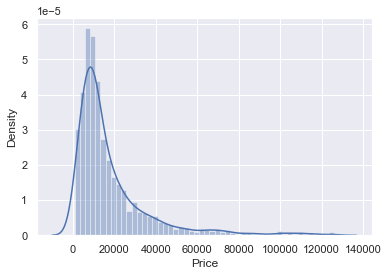

In [31]:
sns.distplot(data_cleaned['Price'])

In [32]:
# Price has exponential curve hence taking its log to normalize it.

data_cleaned['Log_Price'] = np.log(data_cleaned['Price'])

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_Price', ylabel='Density'>

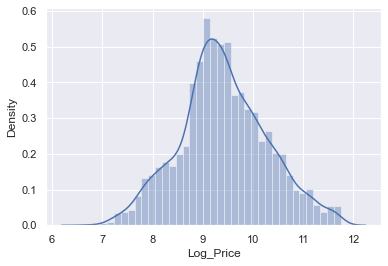

In [33]:
sns.distplot(data_cleaned['Log_Price'])

In [34]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [35]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Type,Demand,Log_Price
0,BMW,sedan,277,2.000000,Petrol,yes,Old,Medium,8.342840
1,Mercedes-Benz,van,427,2.900000,Diesel,yes,Moderate,Low,8.974618
2,Mercedes-Benz,sedan,358,5.000000,Gas,yes,Moderate,Medium,9.495519
3,Audi,crossover,240,4.200000,Petrol,yes,New,Medium,10.043249
4,Toyota,crossover,120,2.000000,Petrol,yes,New,Medium,9.814656
...,...,...,...,...,...,...,...,...,...
4005,Toyota,sedan,35,1.600000,Petrol,yes,New,Medium,9.792556
4006,Mercedes-Benz,sedan,9,3.000000,Diesel,yes,New,Low,11.736069
4007,BMW,sedan,1,3.500000,Petrol,yes,Moderate,Low,8.779557
4008,Toyota,sedan,31,2.764586,Petrol,yes,New,Medium,9.560997


In [36]:
# Creating dummy variables for all categorical variables

data_dummies = pd.get_dummies(data_cleaned,drop_first=True)

In [37]:
data_dummies

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Type_New,Type_Old,Demand_Low,Demand_Medium
0,277,2.000000,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
1,427,2.900000,8.974618,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,358,5.000000,9.495519,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,240,4.200000,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
4,120,2.000000,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,35,1.600000,9.792556,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1
4006,9,3.000000,11.736069,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4007,1,3.500000,8.779557,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4008,31,2.764586,9.560997,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,1


In [39]:
data_dummies.columns

Index(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Type_New', 'Type_Old', 'Demand_Low',
       'Demand_Medium'],
      dtype='object')

In [40]:
cols = ['Log_Price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'Type_New', 'Type_Old', 'Demand_Low',
       'Demand_Medium']

In [41]:
# Just rearranged columns and placed Log_Price at the beginning

data_preprocessed = data_dummies[cols]

In [42]:
# Checking the VIF og all variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_preprocessed.drop(['Log_Price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,6.330454,Mileage
1,9.160286,EngineV
2,2.409624,Brand_BMW
3,2.931834,Brand_Mercedes-Benz
4,1.836957,Brand_Mitsubishi
5,2.251959,Brand_Renault
6,2.242246,Brand_Toyota
7,3.274139,Brand_Volkswagen
8,1.541255,Body_hatch
9,1.560954,Body_other


In [45]:
# Defining inputs and target

targets = data_preprocessed['Log_Price']
inputs = data_preprocessed.drop(['Log_Price'],axis=1)

In [46]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [47]:
# Splitting data into test and training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=23)

In [48]:
# Creating regression model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [49]:
prediction = reg.predict(X_train)


In [50]:
# Score of regression on training data

reg.score(X_train,y_train)


0.8285311537870306

In [51]:
# Making predictions on test data

test_predictions = reg.predict(X_test)


In [52]:
df_pf = pd.DataFrame(np.exp(test_predictions), columns=['Prediction'])
#df_pf.head()

In [53]:
y_test = y_test.reset_index(drop=True)


In [54]:
df_pf['Target'] = np.exp(y_test)


In [55]:
# DataFrame indicating Predictions and target

df_pf

,Prediction,Target
0,1505.398213,1199.0
1,10746.395022,12350.0
2,10110.036983,8250.0
3,14771.615473,14500.0
4,27149.729546,39800.0
...,...,...
797,9068.561608,8100.0
798,4416.226481,5850.0
799,11794.716160,10777.0
800,4386.408640,2700.0


In [56]:
reg.score(X_test,y_test)

0.835639589961051

In [58]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.259610
1,EngineV,0.180092
2,Brand_BMW,0.021591
3,Brand_Mercedes-Benz,0.002952
4,Brand_Mitsubishi,-0.176583
5,Brand_Renault,-0.217017
6,Brand_Toyota,-0.079735
7,Brand_Volkswagen,-0.128482
8,Body_hatch,-0.125441
9,Body_other,-0.086902
